# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

In [11]:
url='http://api.openweathermap.org/data/2.5/weather?'
query_url=f"{url}appid={weather_api_key}&q="
print (query_url)

http://api.openweathermap.org/data/2.5/weather?appid=3cdbdc2f26ea72d81d97f816869f63d6&q=


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
# create lists of dictionaries 
data = []
i=0
#Loop through the cities in the list and append calls when a value is found
for city in cities:  
    i=i+1
    response = requests.get(query_url+city).json() 
    try: 
        
        max_temp=response["main"]["temp_max"]
        hum=response["main"]["humidity"]
        cloud=response["clouds"]["all"]
        wind_spd=response["wind"]["speed"]
        date=response["dt"]
        lat=response["coord"]["lat"]
        lng=response["coord"]["lon"]
        country=response["sys"]["country"]
        data.append([max_temp,hum,cloud,wind_spd,date,lat,lng,country,city])
        print(f"{i} {city}")
        time.sleep(.2)
    except:
        print("citynotfound")
              


1 narsaq
2 kalmunai
3 isangel
4 new norfolk
5 mataura
6 east london
7 tual
8 san francisco
9 punta arenas
10 meulaboh
11 airai
12 hithadhoo
13 maniitsoq
14 srednekolymsk
15 bredasdorp
16 ushuaia
17 bengkulu
18 rikitea
citynotfound
20 hobart
21 boguchany
22 tura
23 lata
24 hamilton
25 hilo
26 bethel
27 filadelfia
28 nanyamba
29 torbay
30 chase
31 olinda
32 charters towers
33 seoul
34 arraial do cabo
35 bereda
36 tasiilaq
37 kavieng
38 hermanus
39 dingle
citynotfound
41 lekoni
citynotfound
43 kalabo
44 atuona
45 cabo san lucas
46 upernavik
47 kupang
48 chokurdakh
49 asau
50 jalu
51 kaset sombun
52 tuatapere
53 gigmoto
54 codrington
citynotfound
56 bluff
57 manokwari
58 komsomolskiy
59 mzimba
60 vaini
61 olavarria
62 san patricio
63 kapaa
64 ukiah
65 hailar
66 ponta do sol
67 victoria
68 mar del plata
69 san policarpo
70 okhotsk
71 nikolskoye
72 barrow
73 qaanaaq
citynotfound
75 longyearbyen
76 puerto ayora
77 saint george
citynotfound
79 jamestown
80 antalaha
81 klaksvik
82 mehamn
83 alb

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
# create dataframe
weather_df = pd.DataFrame(data,columns=['max_temp','hum','cloud','wind_spd','date','lat','lng','country','city'])

In [14]:
# show counts of weather data
weather_df.count()

max_temp    546
hum         546
cloud       546
wind_spd    546
date        546
lat         546
lng         546
country     546
city        546
dtype: int64

In [15]:
# show dataframe
weather_df.head()

,max_temp,hum,cloud,wind_spd,date,lat,lng,country,city
0,281.15,39,75,19.50,1587568527,60.92,-46.05,GL,narsaq
1,301.08,76,71,2.21,1587568527,7.42,81.82,LK,kalmunai
2,298.74,80,99,4.12,1587568527,-19.55,169.27,VU,isangel
3,284.26,73,99,1.98,1587568528,-42.78,147.06,AU,new norfolk
4,282.04,91,77,1.34,1587568528,-46.19,168.86,NZ,mataura


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

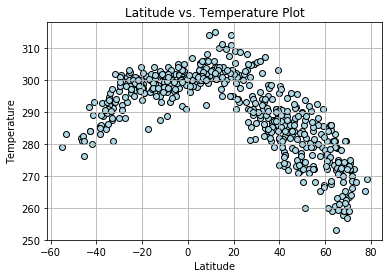

In [16]:
# Create scatter plot latitude and tempature
plt.scatter(weather_df["lat"], weather_df["max_temp"], marker="o", c="lightblue", edgecolor="black")

# Create title and labels 
plt.title("Latitude vs. Temperature Plot")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_lat_vs_temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

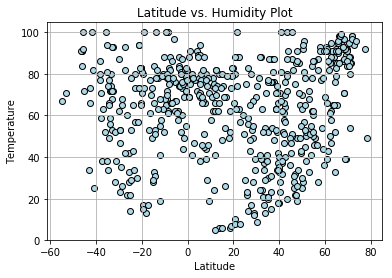

In [17]:
# Create scatter plot latitude and humidity
plt.scatter(weather_df["lat"], weather_df["hum"], marker="o", c="lightblue", edgecolor="black")

# Create title and labels 
plt.title("Latitude vs. Humidity Plot")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_lat_vs_hum.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

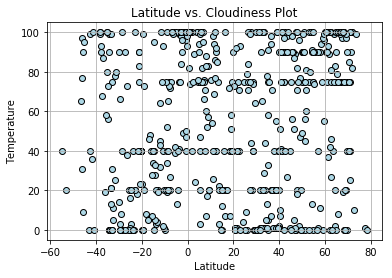

In [18]:
# Create scatter plot latitude and cloudiness
plt.scatter(weather_df["lat"], weather_df["cloud"], marker="o", c="lightblue", edgecolor="black")

# Create title and labels 
plt.title("Latitude vs. Cloudiness Plot")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_lat_vs_cloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

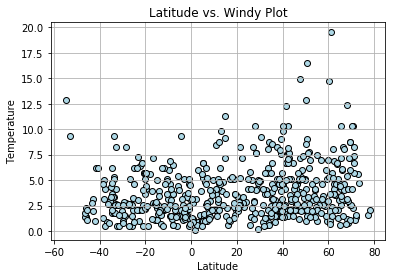

In [19]:
# Create scatter plot latitude and windiness
plt.scatter(weather_df["lat"], weather_df["wind_spd"], marker="o", c="lightblue", edgecolor="black")

# Create title and labels 
plt.title("Latitude vs. Windy Plot")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_lat_vs_wind_spd.png")

# Show plot
plt.show()

## Linear Regression

In [31]:
# Create Northern and Southern Hemisphere DataFrames

# northern dataframe (greater than or equal to 0 degrees latitude) 
north_df = weather_df.loc[(weather_df['lat']>=0)]

# southern dataframe (less than 0 degrees latitude)
south_df = weather_df.loc[(weather_df['lat']<0)]

In [36]:
# OPTIONAL: Create a function to create Linear Regression plots for northern 
    
def scatterplot(x_values,y_values,title,coordinates):
    
    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f'y = {str(round(slope,2))} x + {str(round(intercept,2))} \nR squared: {round(rvalue**2,4)}'
    
    # Plot scatter plot
    plt.scatter(x_values,y_values)
    
    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    
    # Label plot
    plt.xlabel('lat')
    plt.ylabel(title)
    
    #save file 
    plt.savefig(f'.png')
    
    #shot plot
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

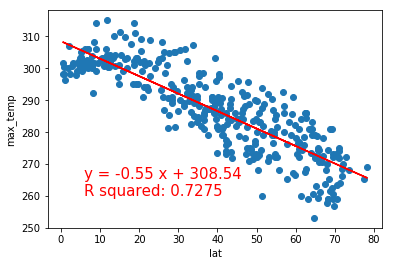

In [38]:
x_values=north_df['lat']
y_values=north_df['max_temp']

scatterplot(x_values,y_values,'max_temp',(6,260))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

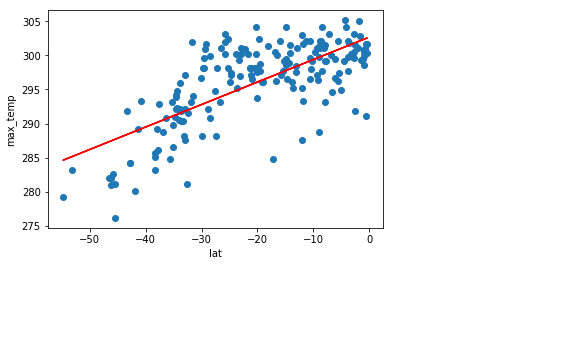

In [47]:
x_values=south_df['lat']
y_values=south_df['max_temp']

scatterplot(x_values,y_values,'max_temp',(6,260))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

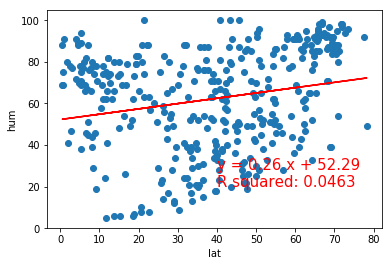

In [40]:
x_values=north_df['lat']
y_values=north_df['hum']

scatterplot(x_values,y_values,'hum',(40,20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

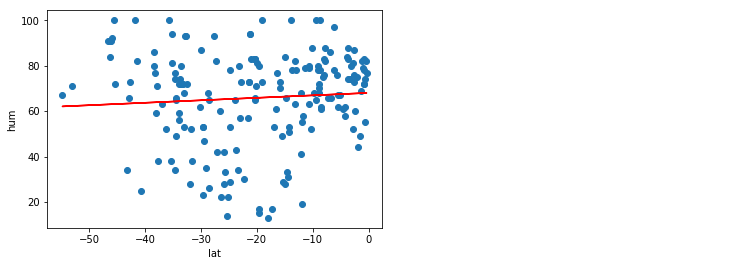

In [50]:
x_values=south_df['lat']
y_values=south_df['hum']

scatterplot(x_values,y_values,'hum',(40,20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

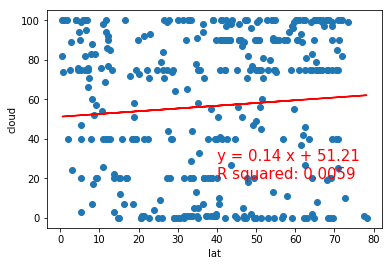

In [42]:
x_values=north_df['lat']
y_values=north_df['cloud']

scatterplot(x_values,y_values,'cloud',(40,20))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

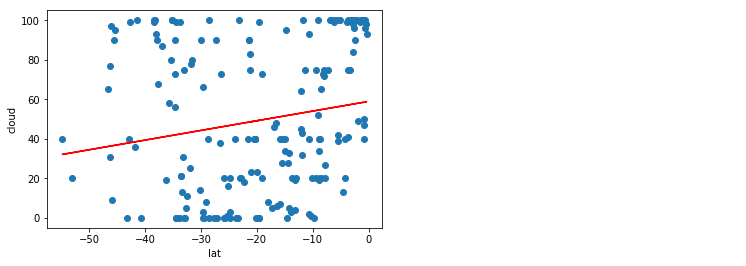

In [51]:
x_values=south_df['lat']
y_values=south_df['cloud']

scatterplot(x_values,y_values,'cloud',(40,20))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

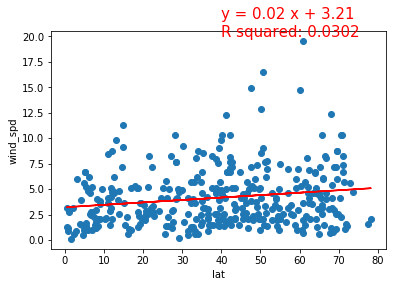

In [46]:
x_values=north_df['lat']
y_values=north_df['wind_spd']

scatterplot(x_values,y_values,'wind_spd',(40,20))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

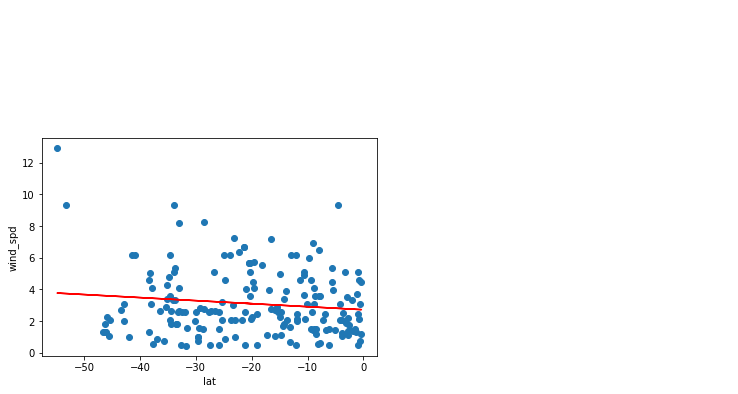

In [52]:
x_values=south_df['lat']
y_values=south_df['wind_spd']

scatterplot(x_values,y_values,'wind_spd',(40,20))